# Assignment 2 : Part A
### Name : Manjiri Kadam
### Student ID : 015312076
## Objective : Write a colab to demonstrate various dimensionality reduction techniques



```
Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

b) any tabular data set (i gave example of iris data set in slides with colab links)
```

# Part A Deliverables : For image dataset

> You need to showcase 

> i) PCA

> ii) SVD

> iii) LLE

> iv) t-SNE

> v) ISOMAP

> vi) UMAP


Dataset used: Sign Langiage MNIST dataset from Kaggle. https://www.kaggle.com/datamunge/sign-language-mnist


In [ ]:
#Data analysis
#Importing the required Python Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
import itertools
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Colab Notebooks/input/amer_sign3.png
/content/drive/MyDrive/Colab Notebooks/input/sign_mnist_test.csv
/content/drive/MyDrive/Colab Notebooks/input/american_sign_language.PNG
/content/drive/MyDrive/Colab Notebooks/input/amer_sign2.png
/content/drive/MyDrive/Colab Notebooks/input/sign_mnist_train.csv
/content/drive/MyDrive/Colab Notebooks/input/sign_mnist_test/sign_mnist_test.csv
/content/drive/MyDrive/Colab Notebooks/input/sign_mnist_train/sign_mnist_train.csv


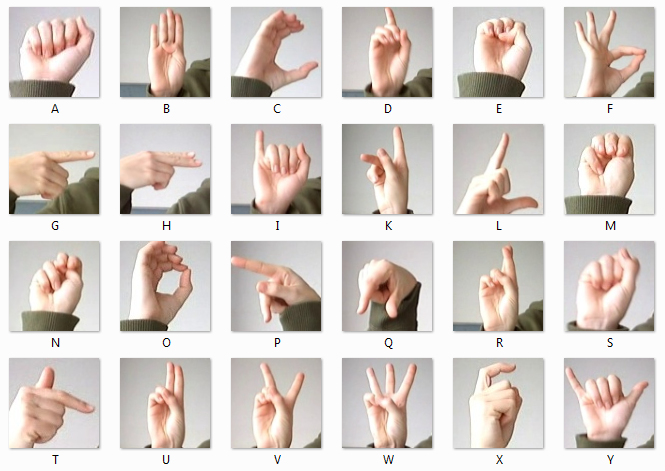

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/input/amer_sign2.png")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/sign_mnist_test/sign_mnist_test.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
df.shape

(7172, 785)

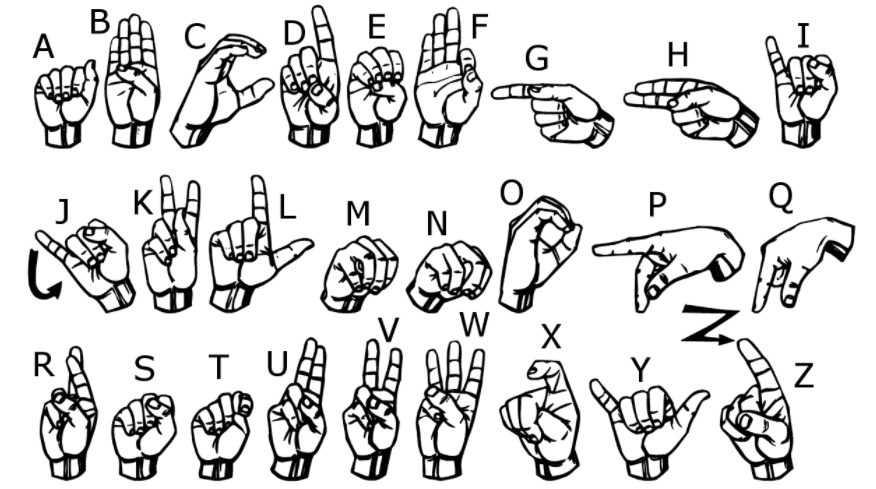

In [ ]:
Image("/content/drive/MyDrive/Colab Notebooks/input/american_sign_language.PNG")

In [ ]:
labels = train['label'].values

In [ ]:
unique_value = np.array(labels)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

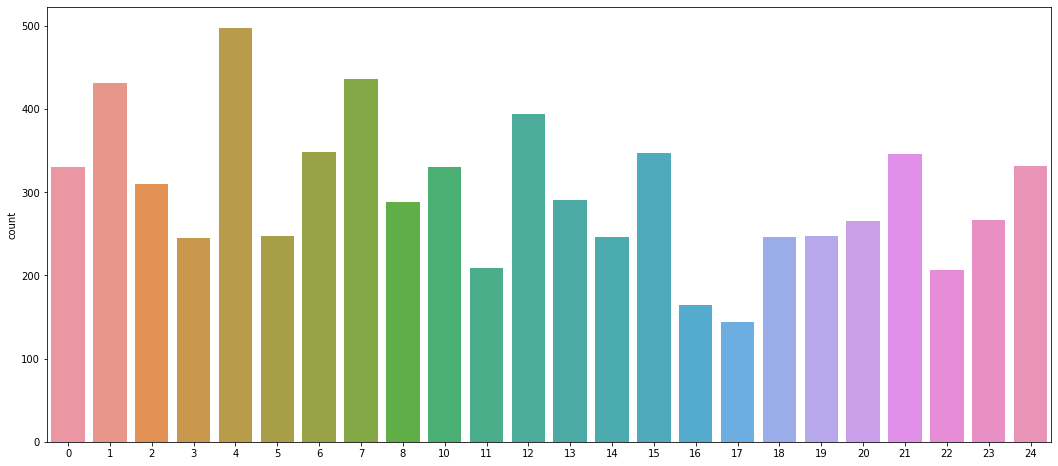

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

# PCA: 

In [ ]:

#Importing library for PCA
from sklearn.decomposition import PCA

In [ ]:
df_pca = df.copy()
df_pca.head(2)

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180

[2 rows x 785 columns]

In [ ]:
#picking only the first 10 labels
df_pca = df_pca[df_pca['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

In [ ]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Electric', # one of plotly colorscales # Rainbow
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'seaborn'
    
    fig.show()

In [ ]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Electric',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'seaborn'

    fig.show()

In [ ]:

from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

In [ ]:
# Implementing PCA
import time
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


Duration: 0.7616729736328125 seconds


In [ ]:
import plotly.io as plt_io
import plotly.graph_objects as go

plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [ ]:
import plotly.express as px
fig = px.scatter(df_pca, x=principalComponents[:, 0], y=principalComponents[:, 1])
fig.show()

In [ ]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

# SVD

In [ ]:
from scipy.linalg import svd, norm

In [ ]:
df_svd =df.copy()
df_svd

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0         6     149     149     150  ...       106       112       120       107
1         5     126     128     131  ...       184       184       182       180
2        10      85      88      92  ...       226       225       224       222
3         0     203     205     207  ...       230       240       253       255
4         3     188     191     193  ...        49        46        46        53
...     ...     ...     ...     ...  ...       ...       ...       ...       ...
7167      1     135     119     108  ...       184       176       167       163
7168     12     157     159     161  ...       210       210       209       208
7169      2     190     191     190  ...       210       211       209       208
7170      4     201     205     208  ...        91        67        70        63
7171      2     173     174     173  ...       195       195       193       192

[7172 rows x 785 columns]

In [ ]:
#picking only the first 10 labels
df_svd = df_svd[df_svd['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

In [ ]:
print(x.shape)
print(y.shape)

(7172, 784)
(7172,)


In [ ]:
X = StandardScaler().fit_transform(x)

In [ ]:
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(x)
# print('Duration: {} seconds'.format(time.time() - start))
# principal = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2','principal component 3'])

#https://machinelearningmastery.com/singular-value-decomposition-for-dimensionality-reduction-in-python/

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

In [ ]:
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.577 (0.015)


In [ ]:
#https://www.kaggle.com/anjum48/has-pca-or-svd-been-performed-on-the-dataset
svd = TruncatedSVD(n_components=3)
generated_svd_data = svd.fit_transform(X)

generated_svd_data = pd.DataFrame(generated_svd_data)
generated_svd_data.describe()

0             1             2
count  7.172000e+03  7.172000e+03  7.172000e+03
mean   1.656975e-16  7.628526e-17 -1.977720e-16
std    1.702851e+01  8.286997e+00  7.316790e+00
min   -4.905153e+01 -2.561160e+01 -1.872776e+01
25%   -1.096041e+01 -5.297241e+00 -4.785181e+00
50%   -4.785474e-01 -2.950042e-01 -9.120059e-01
75%    1.140500e+01  4.937207e+00  2.981612e+00
max    6.078463e+01  2.735693e+01  3.228082e+01

In [ ]:
# fig = px.scatter(generated_svd_data, color_continuous_scale=px.colors.sequential.Inferno)
# fig.show()
generated_svd_data.head(2)

0         1         2
0  17.798480 -2.728703  2.885517
1   9.858433 -3.973975 -1.758810

In [ ]:
fig = px.scatter(generated_svd_data, x=0, y=1,color_continuous_scale=px.colors.sequential.Plotly3)
fig.show()
# generated_svd_data.plot(kind='scatter', x=0, y=1)

In [ ]:
plot_2d(generated_svd_data[0],generated_svd_data[1])

# iii) LLE

In [ ]:
# For LLE analysis
from sklearn.manifold import LocallyLinearEmbedding
df_lle =df.copy()
embedding = LocallyLinearEmbedding(n_components=3, eigen_solver='dense') #result has 3 dimensions
x= df_lle
X = StandardScaler().fit_transform(x)


In [ ]:
X_transformed = embedding.fit_transform(X)

In [ ]:
generated_lle_data = pd.DataFrame(X_transformed)

In [ ]:
generated_lle_data.head(2)

0         1         2
0  0.000485 -0.004640  0.019103
1 -0.005518 -0.001204 -0.003068

In [ ]:
plot_2d(generated_lle_data[0],generated_lle_data[1])

In [ ]:
plot_3d(generated_lle_data[0],generated_lle_data[1],generated_lle_data[2])

# iv) t-SNE

In [ ]:
# For TSNE import below library

from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(df_lle)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 6128.42987537384 seconds


In [ ]:
generated_tsne_data = pd.DataFrame(tsne)

In [ ]:
generated_tsne_data.head(2)

0         1         2
0  10.380940 -6.456168 -0.755710
1 -10.831456  8.331869 -1.704567

In [ ]:
plot_2d(generated_tsne_data[0],generated_tsne_data[1])

In [ ]:
plot_3d(generated_tsne_data[0],generated_tsne_data[1],generated_tsne_data[2])

#v) ISOMAP :

In [ ]:
from sklearn.manifold import Isomap # for Isomap dimensionality reduction
df_iso =df.copy()
df_iso.head(2)

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180

[2 rows x 785 columns]

In [ ]:
x= df_iso
X = StandardScaler().fit_transform(x)


In [ ]:
imap = Isomap(
    n_neighbors=5, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='dense', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

In [ ]:
X_transformed = imap.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 6867.114872217178 seconds


In [ ]:
generated_iso_data = pd.DataFrame(X_transformed)

In [ ]:
generated_iso_data.head(2)

0          1          2
0  13.451510  26.243623  -9.721161
1 -92.202456 -80.573890 -22.703780

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=generated_iso_data[0], y=generated_iso_data[1], z=generated_iso_data[2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

# vi) UMAP

In [ ]:
# Download UMAP:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 49.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=8f8fc4342de1f18949748ec4c6743bfec8e5d93e53a7f4f5fdc10f8b3733a3c9
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=b17645ff43de8778214af469695eac9b106a2b7f89c235d008ae93a4e51af5cf
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
# Import UMAP
import umap

In [ ]:
df_umap =df.copy()
df_umap.head(2)

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180

[2 rows x 785 columns]

In [ ]:
x= df_umap
X = StandardScaler().fit_transform(x)


In [ ]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
umap_ = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Duration: 22.486673593521118 seconds


In [ ]:
generated_umap_data = pd.DataFrame(umap_)

In [ ]:
generated_umap_data.sample(2)

0         1          2
2319 -1.825305 -2.088219  13.599396
3209  4.899302 -3.307253  -9.472501

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=generated_umap_data[0], y=generated_umap_data[1], z=generated_umap_data[2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

### References#
1. https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29
2. https://towardsdatascience.com/isomap-embedding-an-awesome-approach-to-non-linear-dimensionality-reduction-fc7efbca47a0
